In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import time
import scipy
from scipy import ndimage
import pathlib
import numpy as np
from numpy import asarray
import h5py
import matplotlib.pyplot as plt
from PIL import Image
import random
import cv2
import os
from google.colab.patches import cv2_imshow
%cd /content/gdrive/MyDrive/training_set_gender/supportFile
from support import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

/content/gdrive/MyDrive/training_set_gender/supportFile


In [ ]:
train_images = list()
test_images = list()

image_path = '/content/gdrive/MyDrive/training_set_gender/newMale2'
for path in os.listdir(image_path):
  full_path = os.path.join(image_path, path)
  img = Image.open(full_path)
  train_images.append((img,1))

image_path = '/content/gdrive/MyDrive/training_set_gender/newFemale2'
for path in os.listdir(image_path):
  full_path = os.path.join(image_path, path)
  img = Image.open(full_path)
  train_images.append((img,0))
  
image_path = '/content/gdrive/MyDrive/training_set_gender/newMale_validation'
for path in os.listdir(image_path):
  full_path = os.path.join(image_path, path)
  img = Image.open(full_path)
  test_images.append((img,1))

image_path = '/content/gdrive/MyDrive/training_set_gender/newFemale_validation'
for path in os.listdir(image_path):
  full_path = os.path.join(image_path, path)
  img = Image.open(full_path)
  test_images.append((img,0))

print(len(train_images))
random.shuffle(train_images)
random.shuffle(test_images)


238


In [ ]:
def load_data():
    train_data = [asarray(pair[0]) for pair in train_images]
    test_data = [asarray(pair[0]) for pair in test_images]
    train_label = [pair[1] for pair in train_images]
    test_label = [pair[1] for pair in test_images]

    print(np.shape(train_data))

    train_set_x_orig = np.array(train_data) # your train set features
    train_set_y_orig = np.array(train_label) # your train set labels

    print(np.shape(train_set_x_orig))

    test_set_x_orig = np.array(test_data) # your test set features
    test_set_y_orig = np.array(test_label) # your test set labels

    classes = np.array((b'Female', b'Male')) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

(238, 64, 64, 3)
(238, 64, 64, 3)


In [ ]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

(238, 64, 64, 3)
(238, 64, 64, 3)


In [ ]:
print(train_y)

[[1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1
  1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0
  1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0
  1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0
  0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1
  0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1]]


y = 0. It's a Female picture.


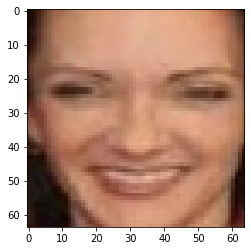

In [ ]:
index = random.randint(0,238)
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [ ]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 238
Number of testing examples: 60
Each image is of size: (64, 64, 3)
train_x_orig shape: (238, 64, 64, 3)
train_y shape: (1, 238)
test_x_orig shape: (60, 64, 64, 3)
test_y shape: (1, 60)


In [ ]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 238)
test_x's shape: (12288, 60)


In [ ]:
### CONSTANTS ###
layers_dims = [12288, 30, 20, 7, 5, 1] #  5-layer model

In [ ]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    #np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    parameters = initialize_parameters_deep(layers_dims)
    
    
    # YOUR CODE ENDS HERE
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):  
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [ ]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.6892898457327964
Cost after iteration 100: 0.5980143994327217
Cost after iteration 200: 0.5415326833199103
Cost after iteration 300: 0.5084055043152792
Cost after iteration 400: 0.47948421512494527
Cost after iteration 500: 0.46482869795458764
Cost after iteration 600: 0.4563737558070997
Cost after iteration 700: 0.40348264976504994
Cost after iteration 800: 0.3195024705406205
Cost after iteration 900: 0.3460335658418284
Cost after iteration 1000: 0.19063072416774957
Cost after iteration 1100: 0.21128745574653832
Cost after iteration 1200: 0.2955424352326733
Cost after iteration 1300: 0.09984766670345427
Cost after iteration 1400: 1.1634336397218703
Cost after iteration 1500: 0.10300472532496116
Cost after iteration 1600: 0.06097038316520835
Cost after iteration 1700: 0.05473467019214236
Cost after iteration 1800: 0.11985207530323799
Cost after iteration 1900: 0.08245463046973893
Cost after iteration 2000: 0.03583388171067723
Cost after iteration 2100: 0.01877

In [ ]:
print(parameters)

{'W1': array([[ 1.43402038e-02, -5.77240960e-03, -5.06356355e-03, ...,
        -3.60595219e-03, -2.86948447e-03,  9.26629039e-03],
       [ 1.06764316e-02,  2.64043507e-03, -6.16866128e-03, ...,
         8.88322588e-03, -1.48748879e-04,  6.55719690e-03],
       [-1.94307350e-02, -1.82823404e-02, -6.85598113e-03, ...,
         6.22429197e-03,  5.76540789e-03,  9.42813753e-03],
       ...,
       [-3.03260673e-02, -2.75069854e-02, -1.79454015e-02, ...,
         1.63512570e-02,  2.39162583e-02,  2.96219590e-02],
       [ 1.15100967e-02, -1.16567431e-02, -1.08167347e-02, ...,
         1.26594176e-03, -4.29863847e-03, -1.74287353e-02],
       [ 1.41044498e-02, -9.27876220e-03, -4.51647193e-03, ...,
        -6.31844238e-03, -6.62854616e-03, -6.76815636e-05]]), 'b1': array([[ 1.19485320e-04],
       [-6.98189317e-04],
       [ 1.06654297e-02],
       [-4.29047752e-05],
       [ 1.47580787e-02],
       [-1.42827423e-03],
       [-2.86671892e-03],
       [ 1.91543024e-02],
       [ 1.53745906e-

In [ ]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        print("prob:" + str(probas[0,i]))
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [ ]:
pred_train = predict(train_x, train_y, parameters)

prob:0.9963916656596675
prob:0.9926404387066844
prob:0.9803587175441172
prob:1.9477533325186165e-05
prob:0.9947355964641894
prob:1.368839403997628e-07
prob:0.9999694172167454
prob:0.9930149218909915
prob:0.00024027052031302569
prob:0.9993900361481431
prob:7.072863825104635e-08
prob:0.9988784996999842
prob:9.997598151175006e-07
prob:0.0006855971804051976
prob:0.00010621912457024134
prob:0.9913694771178904
prob:0.00045543635447585853
prob:0.9853108787163525
prob:0.9797563949516405
prob:0.9998679727057928
prob:0.9998377718526867
prob:0.9998406692738006
prob:0.9998679727057928
prob:1.512480690065242e-08
prob:0.9999874568046563
prob:0.9421582958888244
prob:0.9999241614605712
prob:0.982834399346528
prob:7.897742760848603e-05
prob:0.0009183740111404526
prob:2.4193536658590723e-06
prob:1.189870631587304e-06
prob:0.0002324624051839238
prob:0.9947355964641894
prob:0.999632395567675
prob:0.9999267792147706
prob:0.9998188673787887
prob:0.0012898913312623418
prob:5.539072407757138e-06
prob:0.999994

In [ ]:
pred_test = predict(test_x, test_y, parameters)

prob:0.997521454639744
prob:0.5209098534261447
prob:0.9998783020001644
prob:3.134739009444346e-07
prob:9.72875655099891e-07
prob:0.0005158172662986837
prob:0.9989230525038438
prob:4.274870780537903e-07
prob:0.9989667876751528
prob:1.5741019828576358e-06
prob:0.9891254194480007
prob:0.9999283700628623
prob:0.7702373855657335
prob:0.07662528345976195
prob:0.00011202830488337047
prob:0.0010030237392491116
prob:0.9955651785215719
prob:6.283993155962607e-05
prob:3.4664139587533366e-07
prob:0.9830919010302377
prob:0.00019938211781339802
prob:2.949183368252059e-05
prob:0.9970316245864506
prob:0.8154247232694086
prob:0.0031400908345858266
prob:0.012558295807424767
prob:0.9997525298649474
prob:0.997660825284386
prob:7.447568916624934e-07
prob:0.9992265610899512
prob:0.03399709276980891
prob:0.9772769955641515
prob:7.101089590031595e-06
prob:0.9999429072611252
prob:0.0013773445551667942
prob:0.9998408031720216
prob:0.9847807383632259
prob:0.9995001340347355
prob:1.188174467276563e-07
prob:0.0152

prob:0.9432461834582678
Accuracy: 0.0
y = 1.0, your L-layer model predicts a "Male" picture.


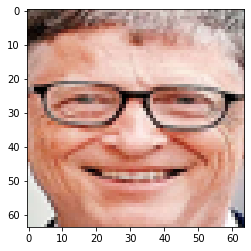

In [ ]:
##Test with real image

my_image = "/content/gdrive/MyDrive/training_set_gender/bill-gates-giau-co-nao-1.jpg" # change this to the name of your image file 
my_label_y = [0] # the true class of your image (1 -> cat, 0 -> non-cat)


fname =  my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = predict(image, my_label_y, parameters)


print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")